In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # #Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()





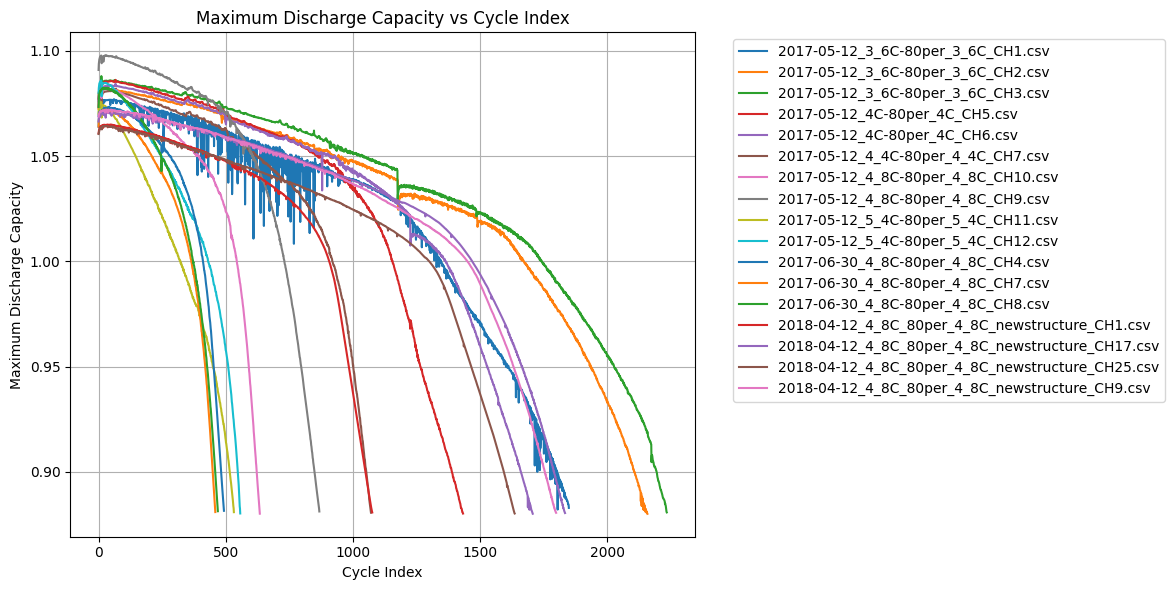

In [22]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

Cycle index VS Discharge capacity

Fichier : 2017-05-12_3_6C-80per_3_6C_CH1.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
1850.0    0.878351
Name: Discharge_Capacity, dtype: float64




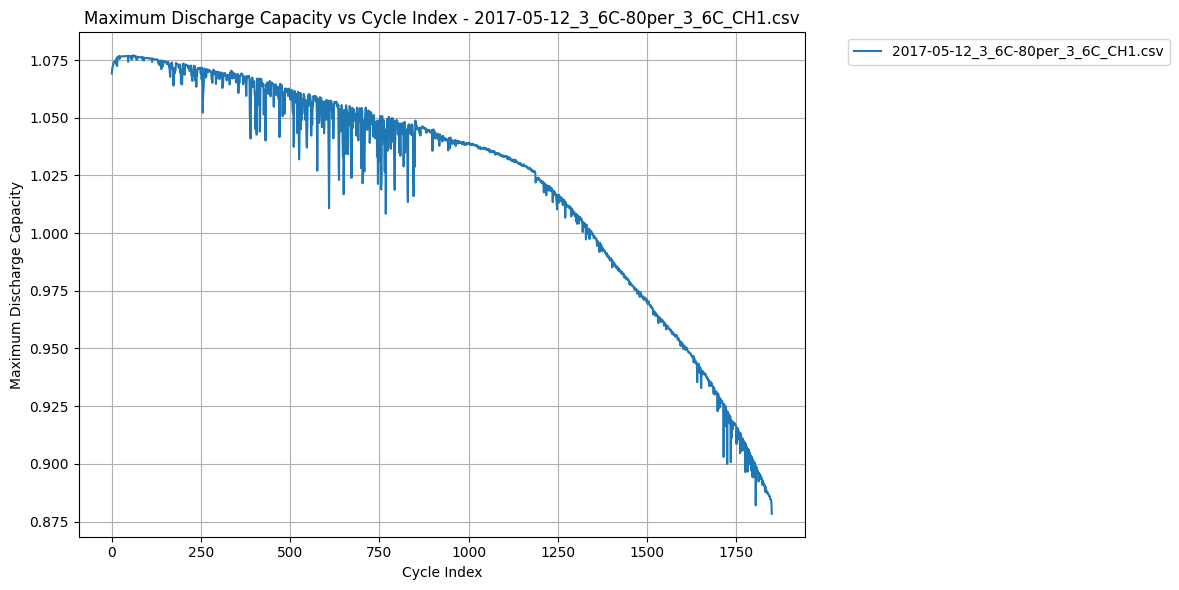

Fichier : 2017-05-12_3_6C-80per_3_6C_CH2.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
2159.0    0.879752
Name: Discharge_Capacity, dtype: float64




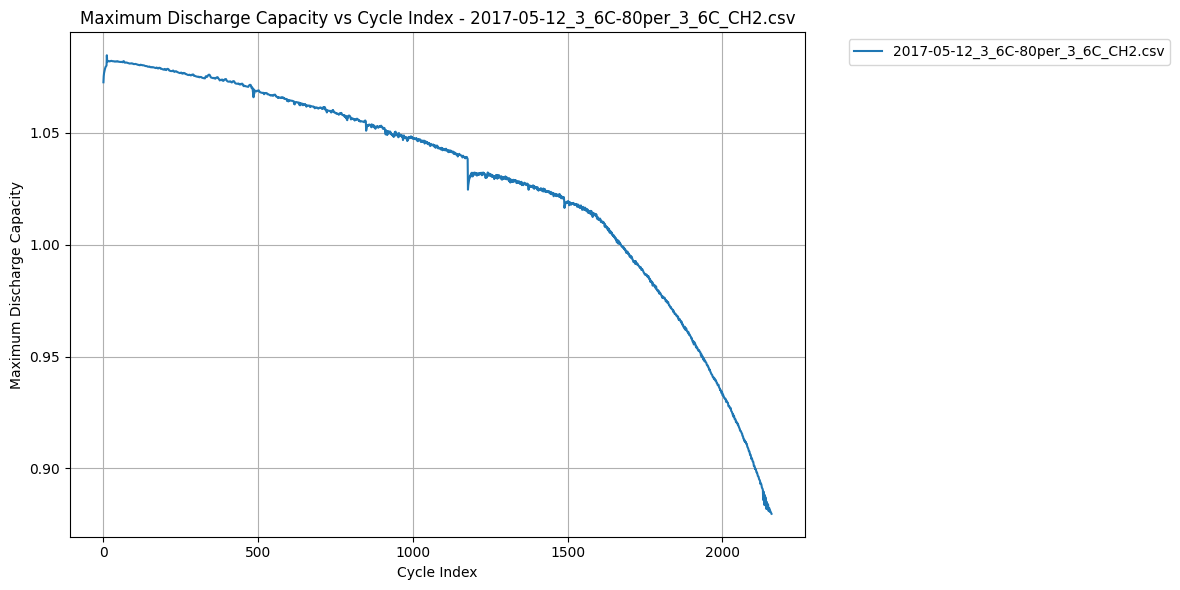

Fichier : 2017-05-12_3_6C-80per_3_6C_CH3.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
2235.0    0.87998
Name: Discharge_Capacity, dtype: float64




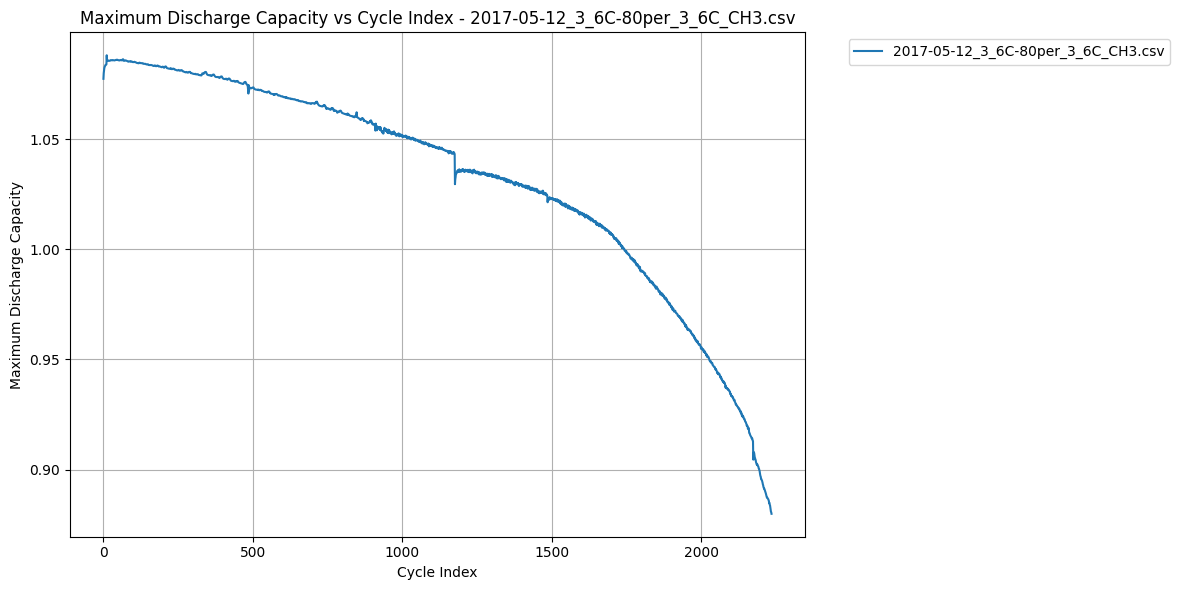

Fichier : 2017-05-12_4C-80per_4C_CH5.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
1434.0    0.879504
Name: Discharge_Capacity, dtype: float64




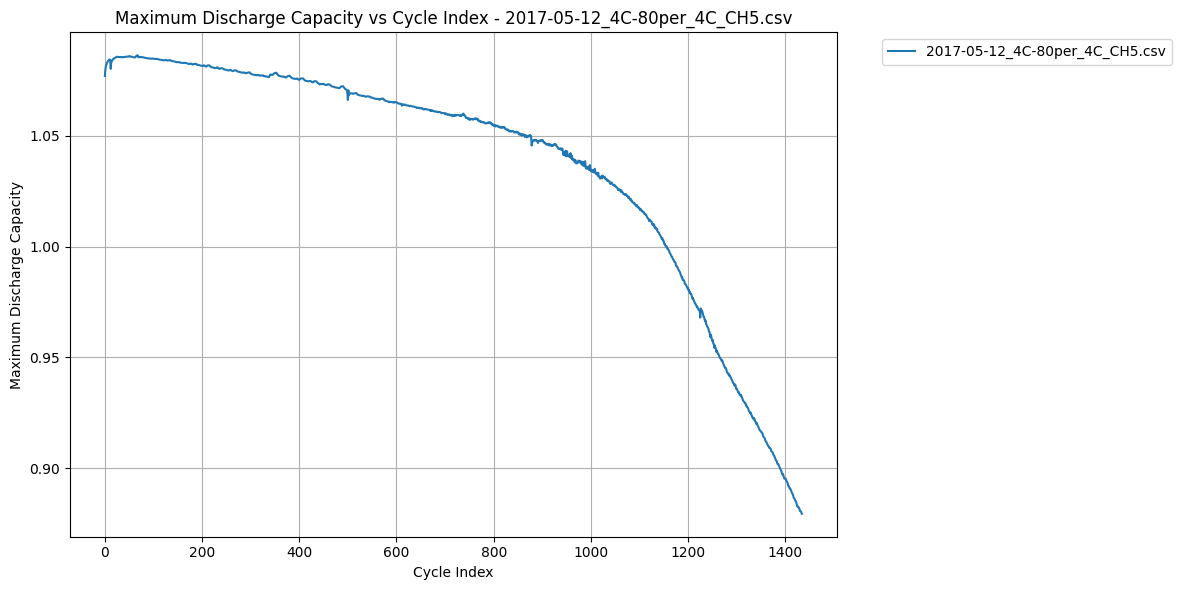

Fichier : 2017-05-12_4C-80per_4C_CH6.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
1708.0    0.879314
Name: Discharge_Capacity, dtype: float64




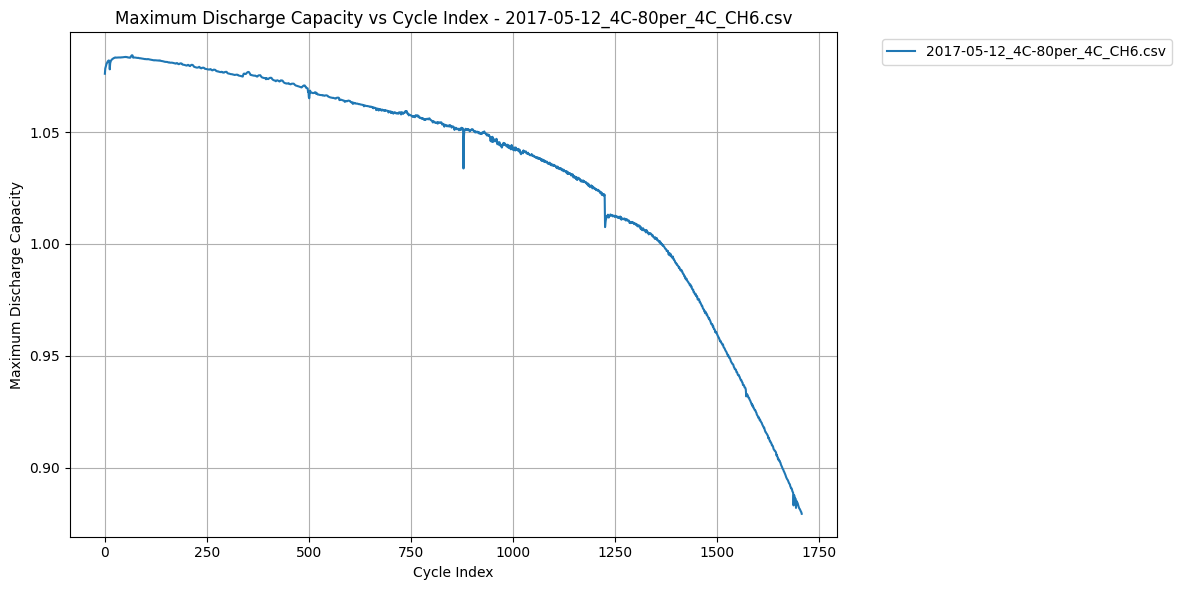

Fichier : 2017-05-12_4_4C-80per_4_4C_CH7.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
1072.0    0.879166
Name: Discharge_Capacity, dtype: float64




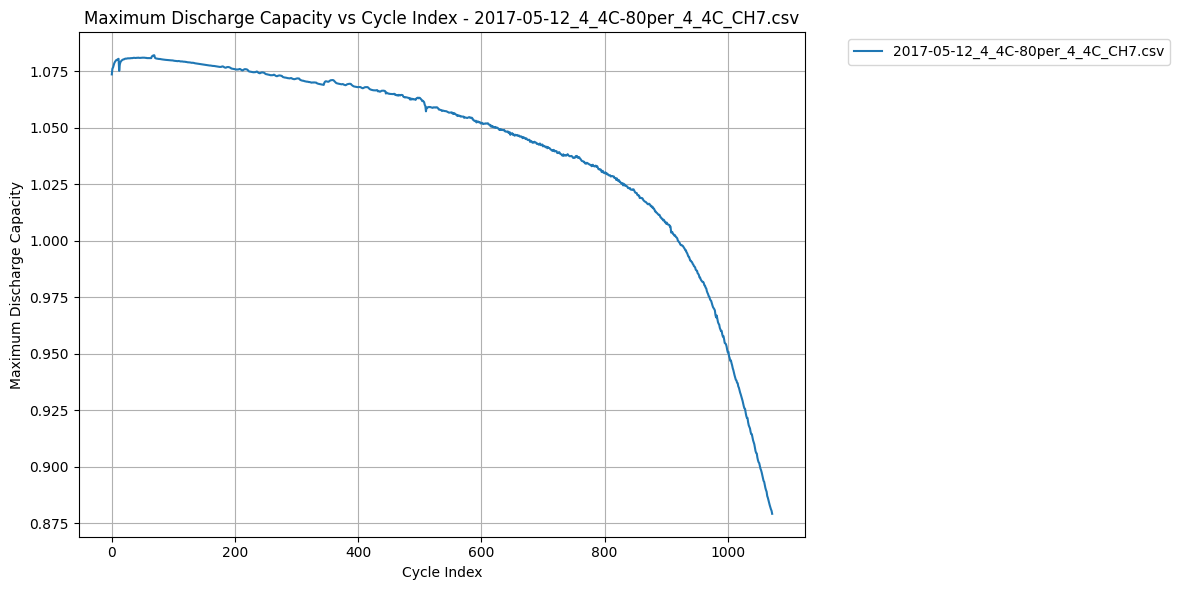

Fichier : 2017-05-12_4_8C-80per_4_8C_CH10.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
635.0    0.878941
Name: Discharge_Capacity, dtype: float64




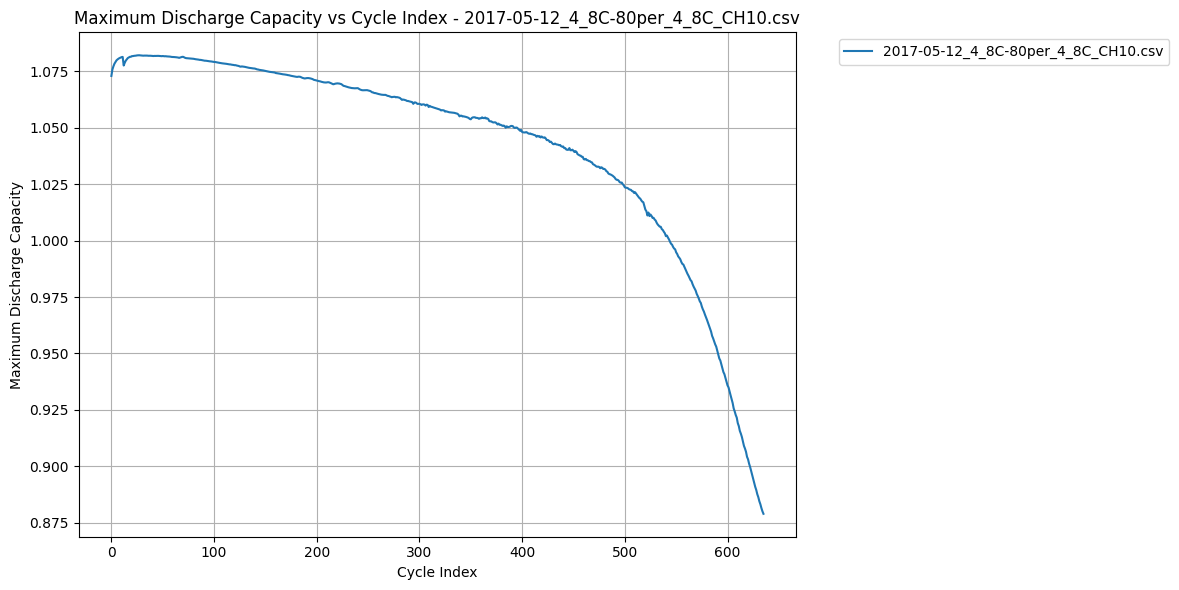

Fichier : 2017-05-12_4_8C-80per_4_8C_CH9.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
869.0    0.879858
Name: Discharge_Capacity, dtype: float64




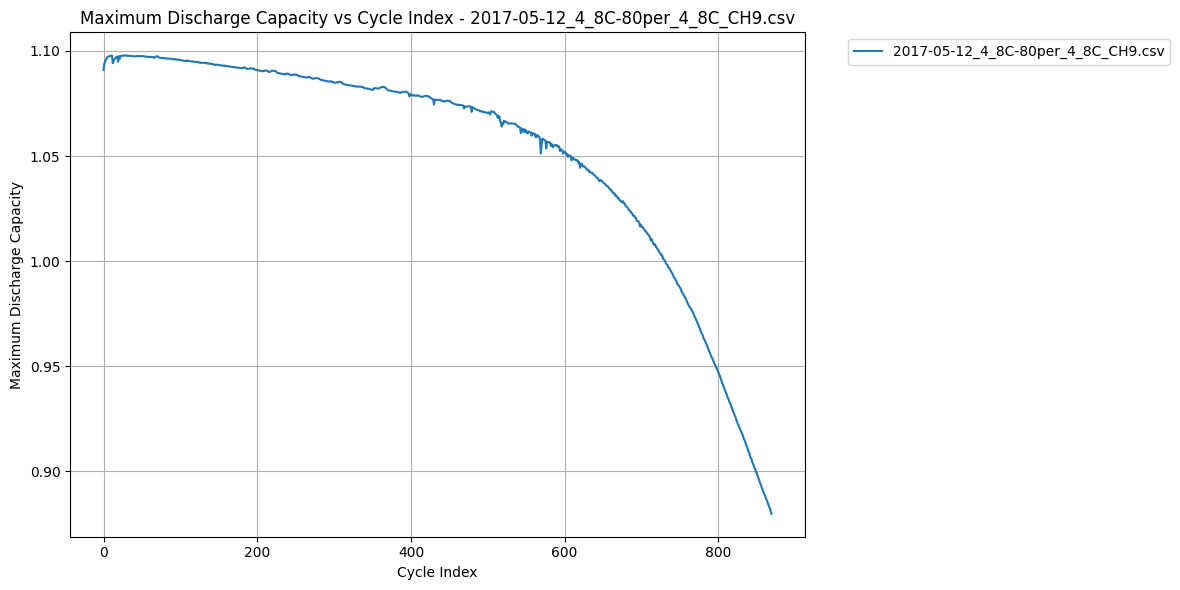

Fichier : 2017-05-12_5_4C-80per_5_4C_CH11.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
533.0    0.879678
Name: Discharge_Capacity, dtype: float64




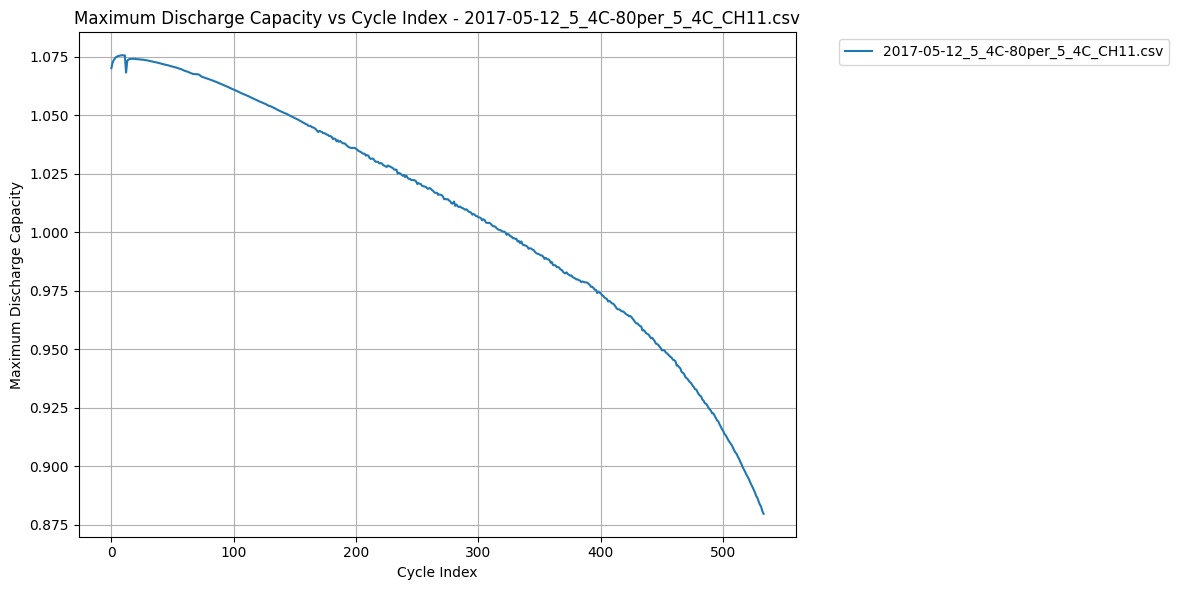

Fichier : 2017-05-12_5_4C-80per_5_4C_CH12.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
558.0    0.878812
Name: Discharge_Capacity, dtype: float64




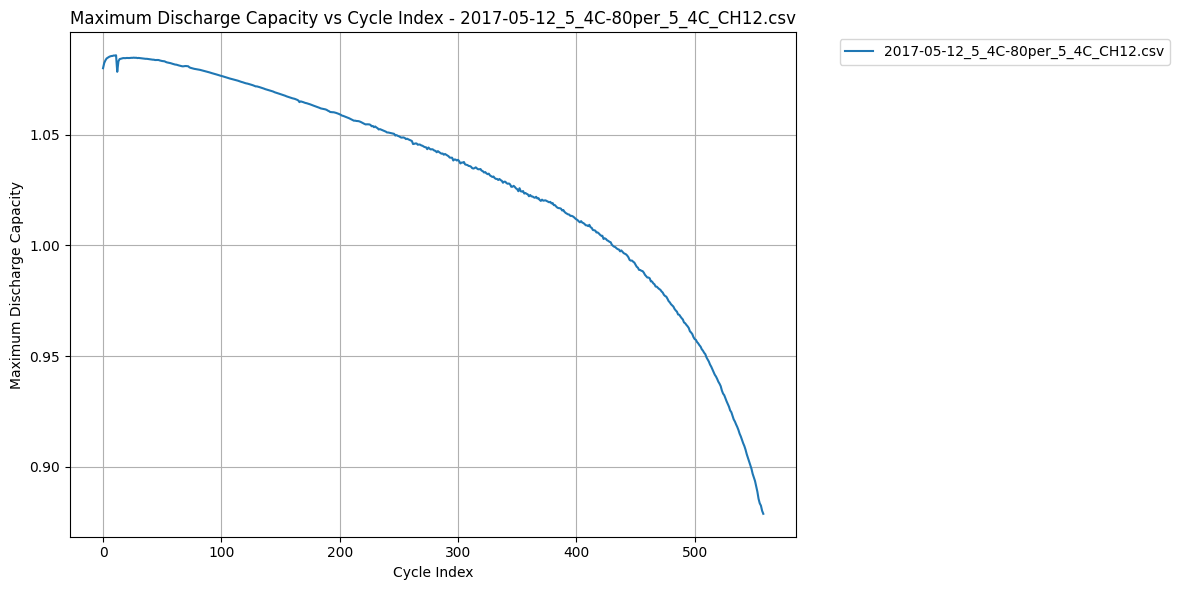

Fichier : 2017-06-30_4_8C-80per_4_8C_CH4.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
494.0    0.879845
495.0    0.878835
496.0    0.876828
497.0    0.874683
498.0    0.872761
499.0    0.871161
Name: Discharge_Capacity, dtype: float64




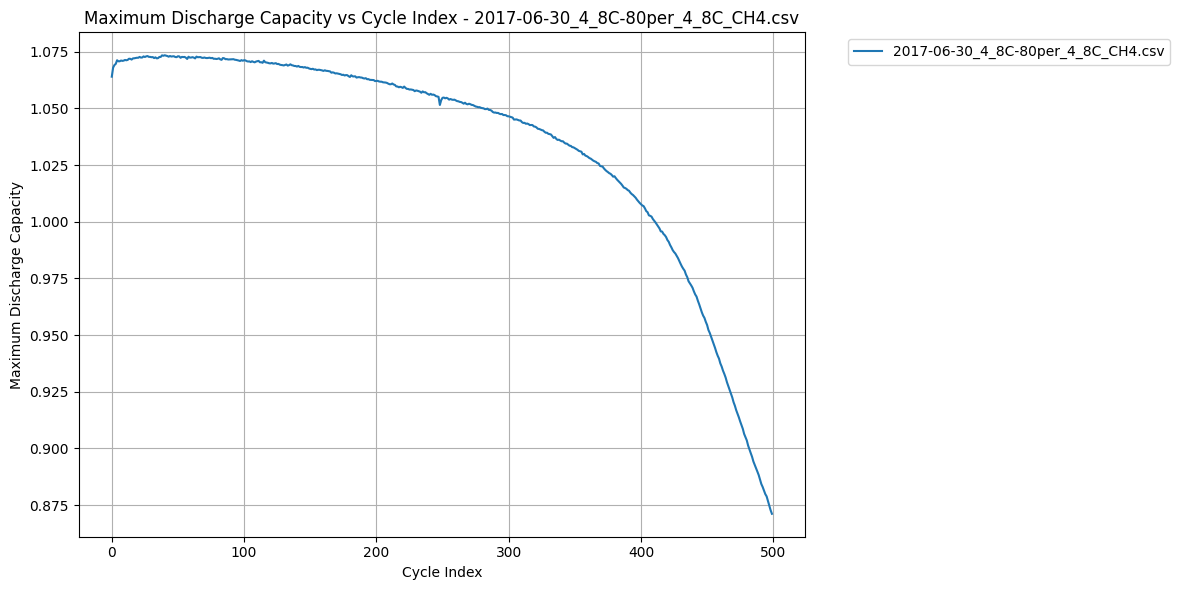

Fichier : 2017-06-30_4_8C-80per_4_8C_CH7.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
460.0    0.879363
461.0    0.877440
462.0    0.875553
463.0    0.873535
464.0    0.871199
Name: Discharge_Capacity, dtype: float64




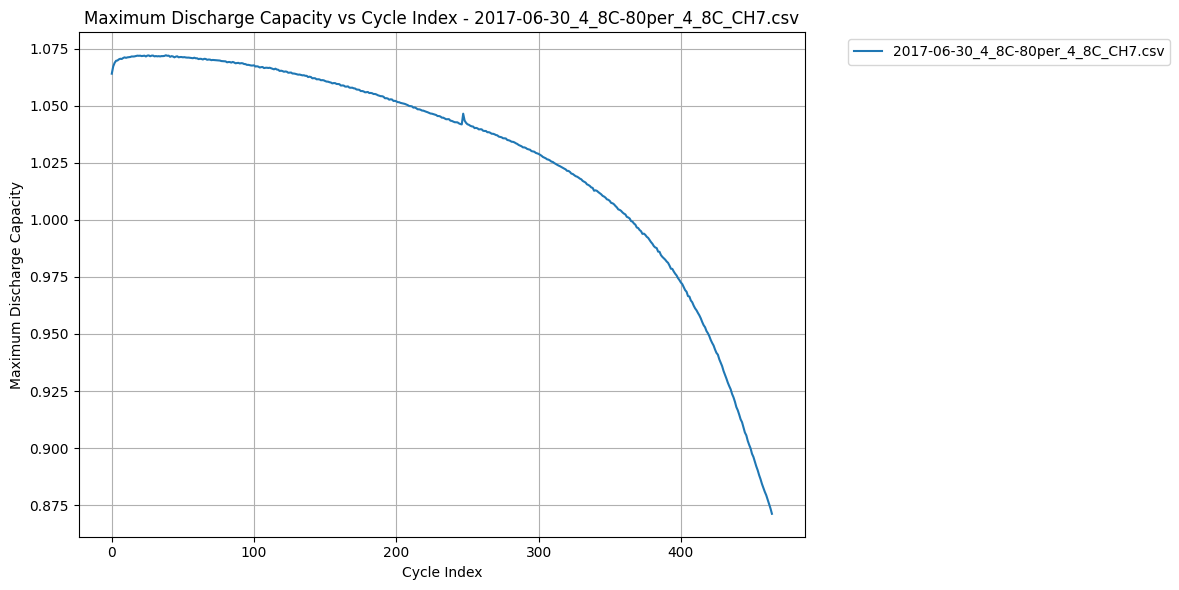

Fichier : 2017-06-30_4_8C-80per_4_8C_CH8.csv
Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :
Cycle_Index
470.0    0.879437
471.0    0.877627
472.0    0.875750
473.0    0.873789
474.0    0.871632
Name: Discharge_Capacity, dtype: float64




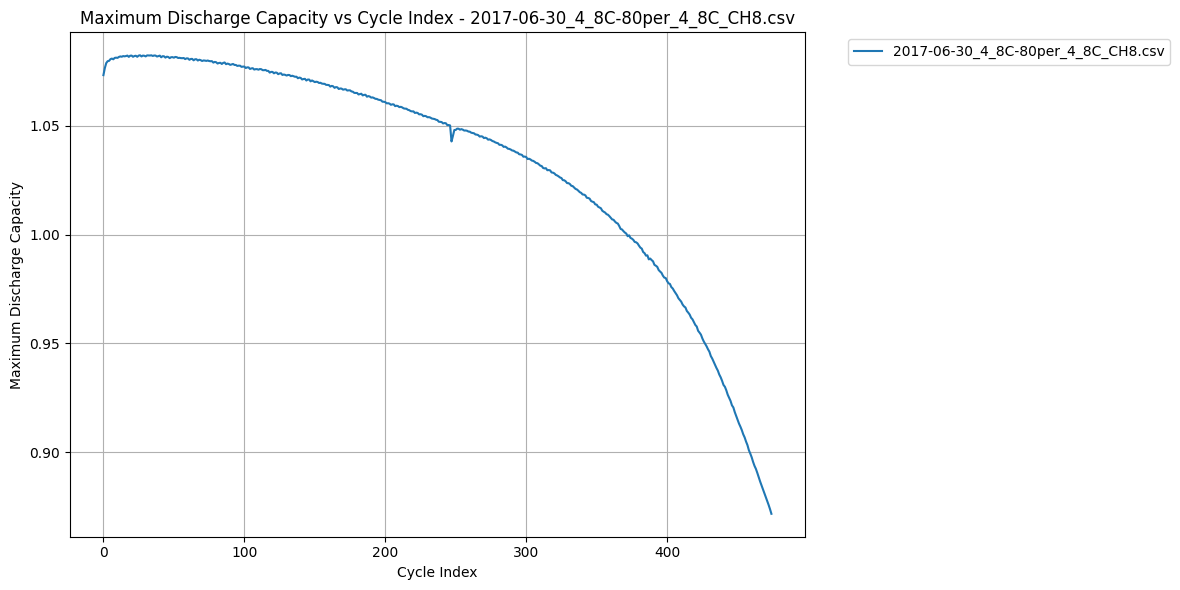

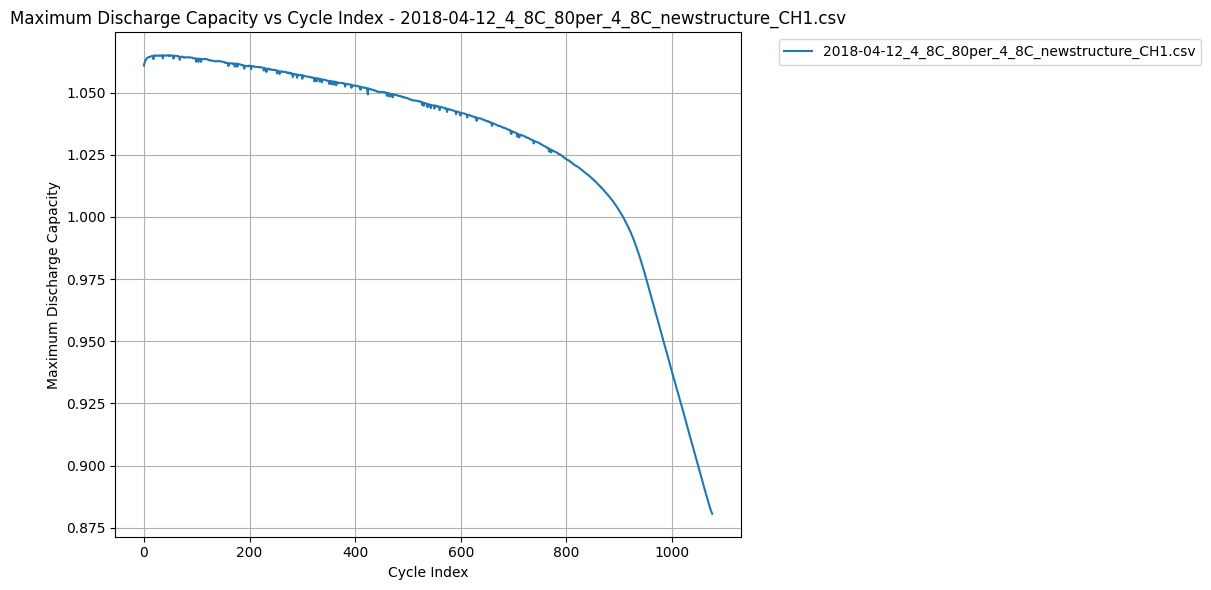

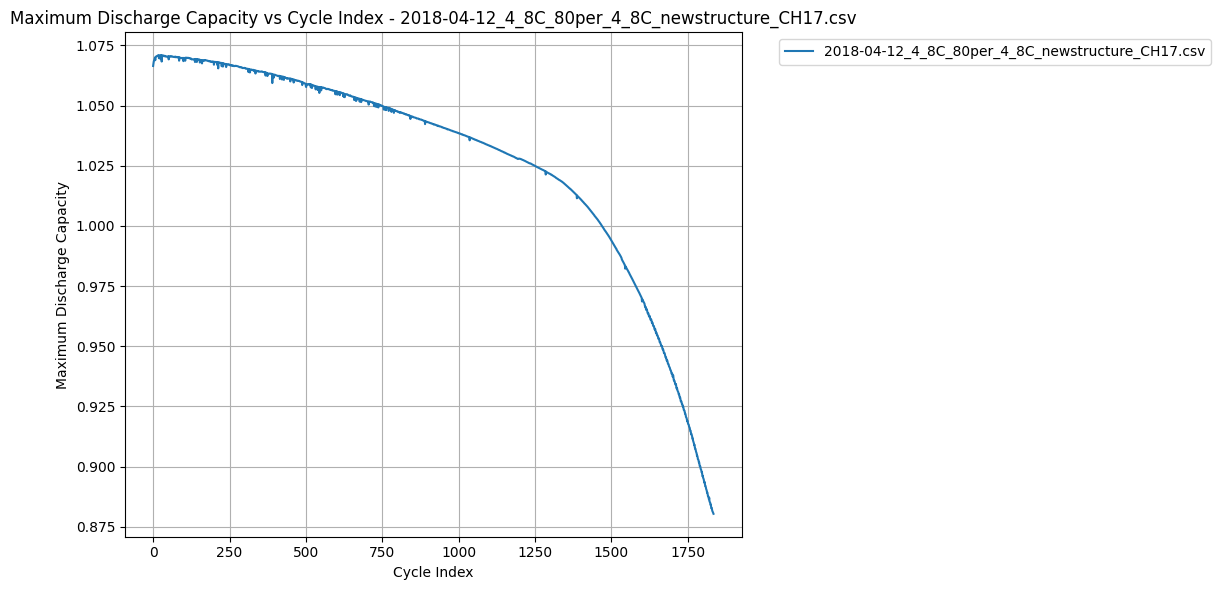

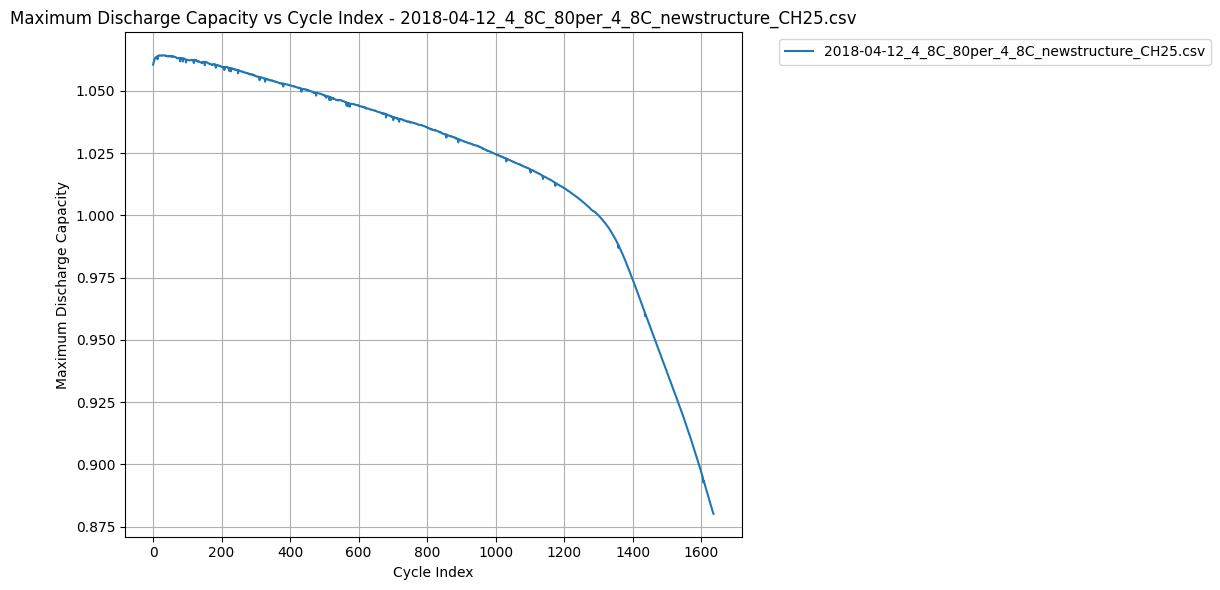

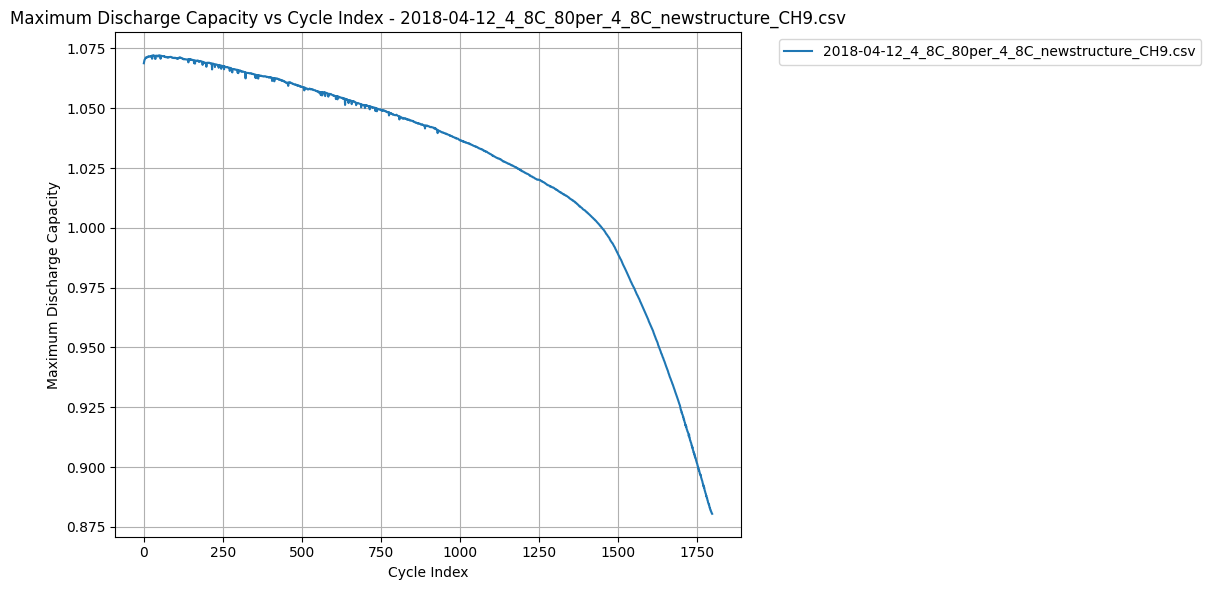

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Répertoire contenant les fichiers CSV
directory = r'C:\Users\pc\Desktop\data\all batchs' 
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)

    # Calculer le maximum de Discharge Capacity par Cycle_Index
    max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

    # Filtrer les cycles où le max Discharge Capacity est > 1.1 ou < 0.88
    filtered_cycles = max_discharge_capacity[(max_discharge_capacity > 1.1) | (max_discharge_capacity < 0.88)]

    # Afficher les numéros de cycle correspondant
    if not filtered_cycles.empty:
        print(f"Fichier : {csv_file}")
        print("Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :")
        print(filtered_cycles)
        print("\n")

    # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
    plt.figure(figsize=(12, 6)) 
    plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)
    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title(f'Maximum Discharge Capacity vs Cycle Index - {csv_file}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    
    # Afficher le graphique
    plt.show()
